### Imbalanced Data: An Overview

#### What is Imbalanced Data?

Imbalanced data occurs when the classes in a dataset are not represented equally. This is common in many real-world applications such as fraud detection, medical diagnosis, and anomaly detection, where the event of interest (e.g., fraudulent transaction, disease occurrence) is rare compared to the normal cases.

#### Problems Arising from Imbalanced Data

1. **Bias Towards Majority Class**:
   - Machine learning models can become biased towards the majority class, as they might learn to predict the majority class more often simply because it minimizes the overall error.
   - For example, in a dataset with 95% non-fraudulent transactions and 5% fraudulent ones, a model might achieve 95% accuracy by predicting all transactions as non-fraudulent. However, this model would fail to detect any fraud, which is the primary interest.

2. **Misleading Performance Metrics**:
   - Common performance metrics like accuracy can be misleading. High accuracy in imbalanced datasets doesn’t necessarily mean good performance.
   - Precision, recall, and F1-score are more informative in these scenarios, as they provide insight into the model’s performance on the minority class.

3. **Poor Generalization**:
   - Models trained on imbalanced data may not generalize well to unseen data, particularly for the minority class, leading to poor real-world performance.

### Handling Imbalanced Data with StratifiedShuffleSplit

StratifiedShuffleSplit is a technique used to split data into training and testing sets while preserving the percentage of samples for each class. This ensures that both the training and testing sets are representative of the original dataset's class distribution.

#### How StratifiedShuffleSplit Addresses Imbalanced Data Issues

1. **Maintains Class Distribution**:
   - By maintaining the original class distribution in both training and testing sets, StratifiedShuffleSplit ensures that the model is trained and evaluated on representative samples of each class.
   - This prevents the issue where the training set might contain only the majority class, leading to a model that cannot recognize the minority class.

2. **Improves Model Training**:
   - With representative samples from both classes, the model has the opportunity to learn the characteristics of both the majority and minority classes, leading to better performance.
   - For example, in a medical dataset with 95% healthy patients and 5% patients with a disease, using stratified splitting ensures that the model sees examples of both healthy and diseased patients during training.

3. **Ensures Fair Evaluation**:
   - The testing set also maintains the class distribution, which provides a fair evaluation of the model’s performance on both the majority and minority classes.
   - This is crucial for understanding how well the model can detect the minority class in real-world scenarios.

This ensures that both `X_train` and `X_test` have a similar class distribution to the original dataset, improving the model’s training and evaluation process.

### Conclusion

Handling imbalanced data is critical for building effective machine learning models. StratifiedShuffleSplit is a valuable tool for addressing these issues by maintaining class distribution across training and testing sets, leading to more balanced and accurate models. This approach helps prevent the model from being biased towards the majority class and provides a more realistic evaluation of the model's performance.

#### Plot the distribution of classes in the data

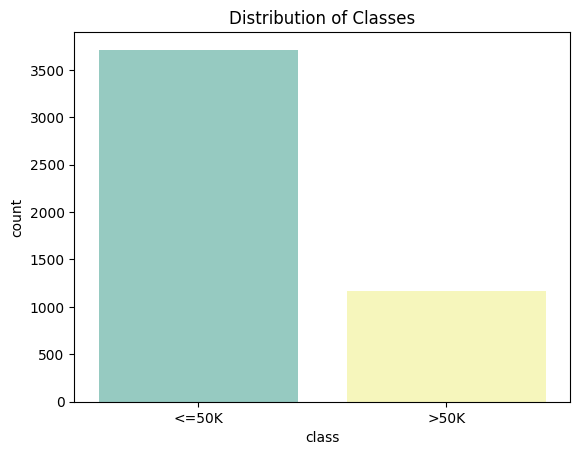

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='class', data=df, hue='class', palette='Set3')
plt.title('Distribution of Classes')
plt.show()

### Stratify in `train_test_split`

#### Description

The `stratify` parameter in `train_test_split` ensures that the train and test splits maintain the same proportion of classes as the original dataset. This is particularly useful for imbalanced datasets where some classes are underrepresented.

#### How It Works

When you set the `stratify` parameter to a target variable (usually the labels or classes), `train_test_split` will:

1. **Compute Class Proportions**: Calculate the proportion of each class in the original dataset.
2. **Maintain Proportions**: Create the train and test splits such that the class proportions are approximately the same as those in the original dataset.

#### Example Usage

In the context of binary classification with an imbalanced dataset, you can use the `stratify` parameter to ensure that both training and testing sets have a similar distribution of the classes.

### Benefits of Using Stratify

1. **Balanced Splits**: Ensures that the class distribution is the same in both training and testing sets, which is crucial for fair evaluation.
2. **Improved Model Performance**: Helps in training models that perform better on minority classes, especially in imbalanced datasets.
3. **Reliable Metrics**: Provides more reliable performance metrics by ensuring that the evaluation set has the same class distribution as the training set.

### Conclusion

Using the `stratify` parameter in `train_test_split` is a simple yet effective way to handle class imbalance during data splitting. It ensures that your training and testing sets are representative of the overall class distribution, leading to more reliable model training and evaluation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
target = 'class'
X = df.drop(columns=[target])
y = df[target].apply(lambda x: 1 if x == '>50K' else 0)  # Convert target to binary

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes
print("Class distribution in y_train:", y_train.value_counts())
print("Class distribution in y_test:", y_test.value_counts())

# Identify column types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the full pipeline with a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Perform cross-validation to check for overfitting
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Class distribution in y_train: class
0    29724
1     9349
Name: count, dtype: int64
Class distribution in y_test: class
0    7431
1    2338
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7431
           1       0.74      0.60      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

Cross-validation scores:  [0.85540627 0.85745361 0.85335893 0.84758126 0.85116458]
Mean cross-validation score:  0.8529929301558745


#### Plot the distribution of classes in the training set

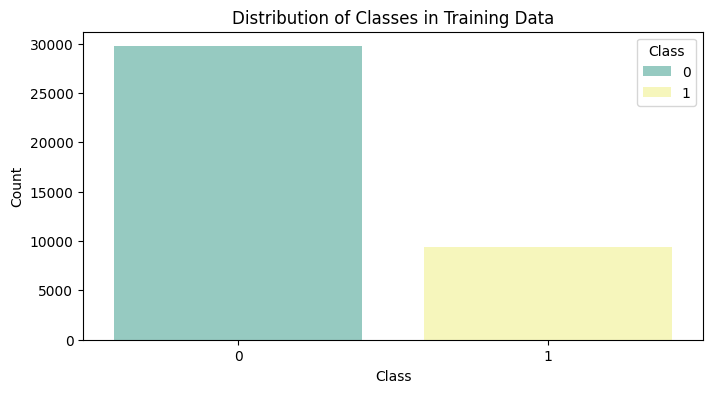

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of classes in the training set
plt.figure(figsize=(8,4))
sns.countplot(x=y_train, hue=y_train, palette='Set3', dodge=False)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

## 1. Resampling Techniques

1. **Resampling Techniques**:
   - **Oversampling**: Increase the number of instances in the minority class.
   - **Undersampling**: Decrease the number of instances in the majority class.

2. **Synthetic Data Generation**:
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generate synthetic samples for the minority class.

3. **Class Weights**:
   - Modify the algorithm to give more weight to the minority class during training.

4. **Anomaly Detection Techniques**:
   - Treat the minority class as anomalies and use anomaly detection algorithms.



### Oversampling

Oversampling the minority class to match the majority class:


Class distribution after oversampling: class
0    29724
1    29724
Name: count, dtype: int64


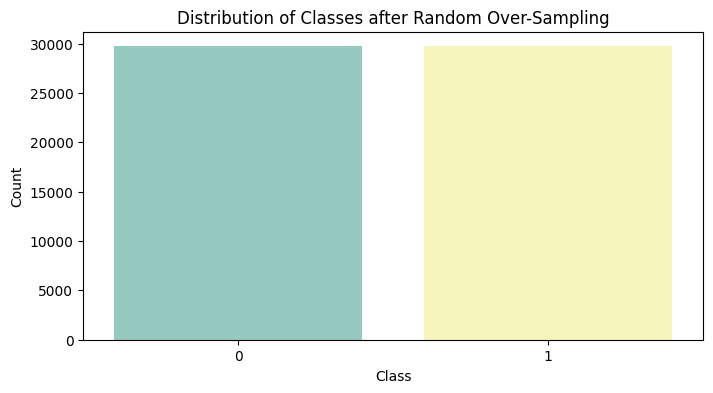

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to balance the class distribution
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the distribution of classes after oversampling
print("Class distribution after oversampling:", y_resampled.value_counts())

# Plot the class distribution after Random Over-Sampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled, hue=y_resampled, palette='Set3', legend=False)
plt.title('Distribution of Classes after Random Over-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Undersampling

Undersampling the majority class to match the minority class:

Class distribution after undersampling: class
0    9349
1    9349
Name: count, dtype: int64


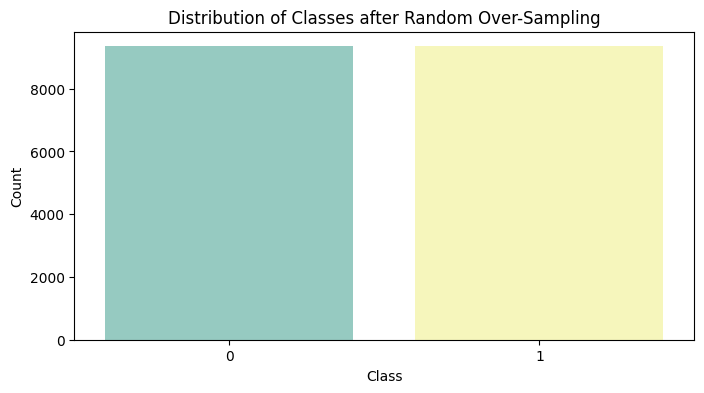

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to balance the class distribution
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the distribution of classes after undersampling
print("Class distribution after undersampling:", y_resampled.value_counts())

# Plot the class distribution after Random Over-Sampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled, hue=y_resampled, palette='Set3', legend=False)
plt.title('Distribution of Classes after Random Over-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### 2. Class Weights

Modify the model to account for class imbalance by giving more weight to the minority class:

In [ ]:
# Create the pipeline with LogisticRegression with class_weight='balanced'
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      7431
           1       0.57      0.84      0.68      2338

    accuracy                           0.81      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769



### 3. Synthetic Data Generation

SMOTE - Generate synthetic samples for the minority class. Does not accept missing values. NaNs and incorrect processing of the target variable caused errors that were solved in the following steps.

### Key Changes and Debugging Steps

1. **Strip Extra Whitespace**:
   - The target variable values were stripped of any extra whitespace to ensure correct comparison and conversion. This was done with `x.strip() == '>50K'`.

2. **Print Unique Values of the Target Variable**:
   - Before and after converting the target to binary, the unique values of the target variable were printed. This helped ensure that the conversion process was handled correctly and that there were indeed two distinct classes in the dataset.

3. **Class Distribution Checks**:
   - The class distribution in the entire dataset, as well as in the training and test splits, was printed. This confirmed that the dataset and splits contained both classes.

4. **Ensured No Missing Values After Preprocessing**:
   - Added a check for missing values in the preprocessed training data to ensure SMOTE received clean data.



Unique values in the original target variable: ['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']
Unique values in the target variable after conversion: [0, 1]
Categories (2, int64): [0, 1]
Class distribution in the entire dataset: class
0    37155
1    11687
Name: count, dtype: int64
Class distribution in y_train: class
0    29724
1     9349
Name: count, dtype: int64
Class distribution in y_test: class
0    7431
1    2338
Name: count, dtype: int64
Any missing values in preprocessed X_train: 0
Class distribution after SMOTE: class
0    29724
1    29724
Name: count, dtype: int64


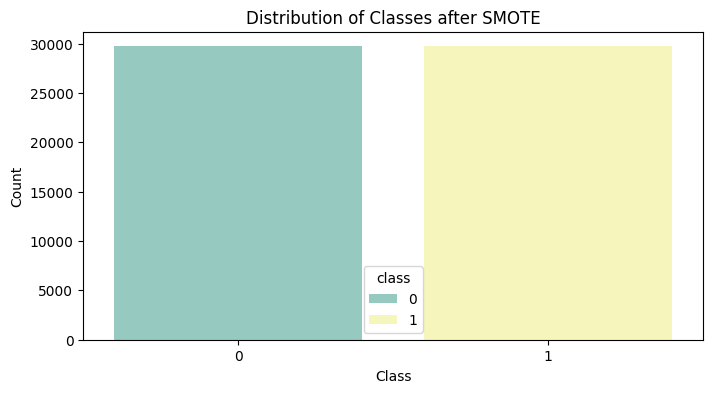

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7431
           1       0.57      0.84      0.68      2338

    accuracy                           0.81      9769
   macro avg       0.76      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769

Cross-validation scores:  [0.8134357  0.80626999 0.80857326 0.80355772 0.81149219]
Mean cross-validation score:  0.808665772230593


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Print unique values of the target variable in the original dataset
print("Unique values in the original target variable:", df['class'].unique())

# Select features and target
target = 'class'
X = df.drop(columns=[target])
# Convert target to binary, strip any extra whitespace
y = df[target].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Print unique values after converting the target to binary
print("Unique values in the target variable after conversion:", y.unique())

# Check the distribution of classes before split
print("Class distribution in the entire dataset:", y.value_counts())

# Perform stratified split to ensure both classes are represented in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes after split
print("Class distribution in y_train:", y_train.value_counts())
print("Class distribution in y_test:", y_test.value_counts())

# Identify column types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing pipeline to handle missing values
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the preprocessing pipeline on the training data and transform it
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

# Check for any remaining missing values after preprocessing
print("Any missing values in preprocessed X_train:", pd.DataFrame(X_train_preprocessed).isnull().sum().sum())

# Apply SMOTE to the preprocessed data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Check the distribution of classes after SMOTE
print("Class distribution after SMOTE:", y_resampled.value_counts())

# Plot the class distribution after SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled, hue=y_resampled, palette='Set3', dodge=False, legend=False)
plt.title('Distribution of Classes after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Create the final pipeline with preprocessing, SMOTE, and LogisticRegression
final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Perform cross-validation to check for overfitting
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


### 4. Anomaly Detection Techniques

Treat the minority class as anomalies and use anomaly detection algorithms:


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Print unique values of the target variable in the original dataset
print("Unique values in the original target variable:", df['class'].unique())

# Select features and target
target = 'class'
X = df.drop(columns=[target])
# Convert target to binary, strip any extra whitespace
y = df[target].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Print unique values after converting the target to binary
print("Unique values in the target variable after conversion:", y.unique())

# Check the distribution of classes before split
print("Class distribution in the entire dataset:", y.value_counts())

# Perform stratified split to ensure both classes are represented in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes after split
print("Class distribution in y_train:", y_train.value_counts())
print("Class distribution in y_test:", y_test.value_counts())

# Identify column types
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing pipeline to handle missing values
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the preprocessing pipeline on the training data and transform it
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Check for any remaining missing values after preprocessing
print("Any missing values in preprocessed X_train:", pd.DataFrame(X_train_preprocessed).isnull().sum().sum())
print("Any missing values in preprocessed X_test:", pd.DataFrame(X_test_preprocessed).isnull().sum().sum())

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=len(y_train[y_train == 1]) / len(y_train), random_state=42)
y_train_pred = iso_forest.fit_predict(X_train_preprocessed)
y_test_pred = iso_forest.predict(X_test_preprocessed)

# Convert predictions: -1 (anomaly) to 1 (minority class), 1 (normal) to 0 (majority class)
y_train_pred = [1 if x == -1 else 0 for x in y_train_pred]
y_test_pred = [1 if x == -1 else 0 for x in y_test_pred]

print("Isolation Forest Model Performance on Training Data")
print(classification_report(y_train, y_train_pred))

print("Isolation Forest Model Performance on Test Data")
print(classification_report(y_test, y_test_pred))


Unique values in the original target variable: ['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']
Unique values in the target variable after conversion: [0, 1]
Categories (2, int64): [0, 1]
Class distribution in the entire dataset: class
0    37155
1    11687
Name: count, dtype: int64
Class distribution in y_train: class
0    29724
1     9349
Name: count, dtype: int64
Class distribution in y_test: class
0    7431
1    2338
Name: count, dtype: int64
Any missing values in preprocessed X_train: 0
Any missing values in preprocessed X_test: 0
Isolation Forest Model Performance on Training Data
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     29724
           1       0.21      0.21      0.21      9349

    accuracy                           0.62     39073
   macro avg       0.48      0.48      0.48     39073
weighted avg       0.62      0.62      0.62     39073

Isolation Forest Model Performance on Test Data
              precis

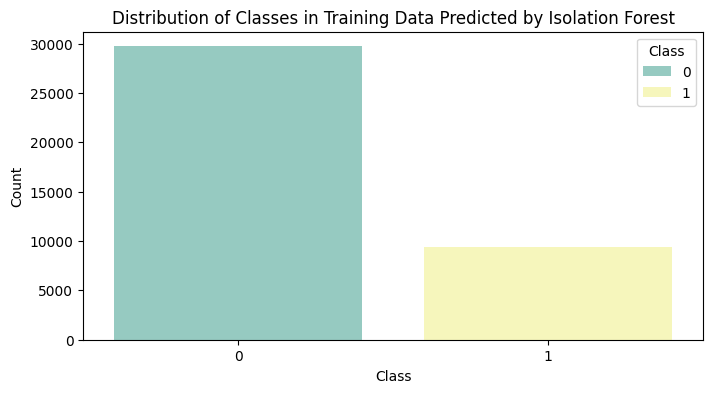

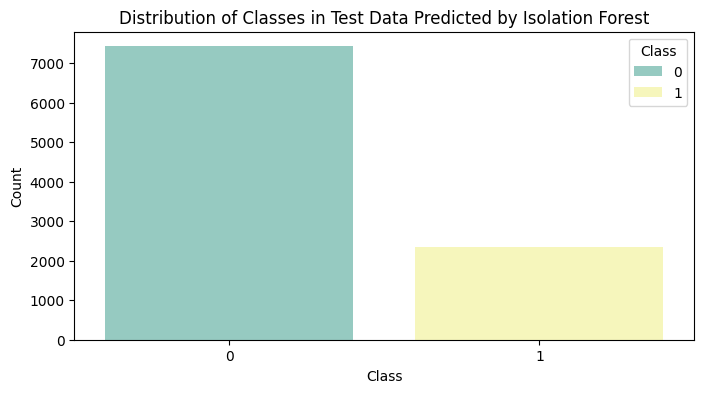

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution for the training data predictions
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_pred, hue=y_train_pred, palette='Set3', dodge=False)
plt.title('Distribution of Classes in Training Data Predicted by Isolation Forest')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

# Plot the class distribution for the test data predictions
plt.figure(figsize=(8, 4))
sns.countplot(x=y_test_pred, hue=y_test_pred, palette='Set3', dodge=False)
plt.title('Distribution of Classes in Test Data Predicted by Isolation Forest')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()
